# <center>MACHINE LEARNING <br> LAB Session 1</center>

### Due date: up to May, 19th, 23:55h. 
### Submission procedure: via Moodle.

### Objectives: 

In this lab session we will work through a case study of regression predictive modeling problem in Python from scratch following each step phase of a machine learning project: from data exploration to prediction and validation. In particular, the main goals are:
- Exploratory data analysis: descriptive statistics, unimodal and multimodal data visualizations
- Optimization development based on gradient descent: one and multiple variables
- Overfitting prevention: regularization using Ridge and Lasso
- Evaluation of algorithms and effect of variables standardization


### Deliverables per team of two persons:
1. A zip file with all the Python/Jupiter Notebooks. They should be functional and have sufficient comments to allow for proper interpretation.

2. A report consisting of 2 sections:    
    (a) A brief description of the Python functions, their inputs and outputs, and their interoperability. (Approximate length: 1 page).    
    (b) A simulation section that addresses the questions formulated below.

###### Note 1: make sure the plots you include are large enough to be readable (preferably no more than two figures per page), and include legends.

***
### Use Case description:
In this lab exercise we work as data scientists in a large real state company in USA. The sales managers of our company asked us to develop a new analytical model to estimate the market value of houses in Boston.

To develop this use case we will follow each step of a regression machine learning process. We will work with the Boston House Price dataset that was published by the Boston Standard Metropolitan Statistical Area in the 70s. **Each record in the database describes a Boston suburb or town**. The dataset housing.csv (**download it!**) is a modified version of the Boston Housing dataset from the UCI Machine Learning Repository.  The attributes are defined as follows:
 
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million) 1
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centers
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk − 0.63)2 where Bk is the proportion of blacks by town
13. LSTAT: % lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000s

Notice that MEDV is our target value $t$ since we are asked to estimate the price of the houses in Boston. Thus, our input attributes $x_1,\dots,x_D$ are the other 13 attributes (so $D = 13$).  The features 'RM', 'LSTAT', and 'PTRATIO' give us quantitative information about each data point. 

***
### Questions

In [2]:
# Read dataset and import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# Load the Boston housing dataset
boston = pd.read_csv('BostonHousing.csv')
boston.head()

# t0 = ?
# X0 = ?

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Q1. Exploratory data analysis**

Consider the 3 most significative attributes (RM, LSTAT and PTRATIO) and the variable to predict (MEDV).

a) Evaluate the dimension of the dataset and the type of the given variables (float, string, integer, etc.).

b) Generate a table with the main statistics of the distribution (i.e. mean, standard deviation, median, min and max) of each attribute.

c) Calculate the correlation between all of the numeric attributes and comment the results. Which are the variables with more and less correlation with respect to the variable to predict (MEDV)?

d) Plot a histogram of each of the numeric attributes. Can you recognize any specific distribution (exponential, bimodal...)? 

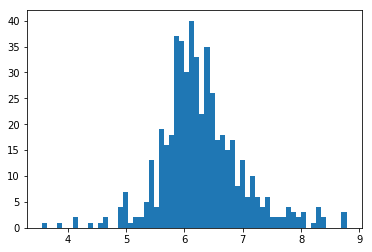

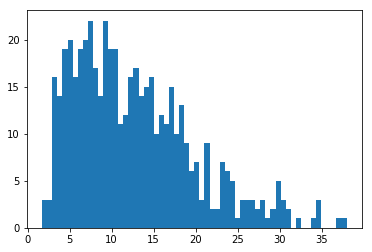

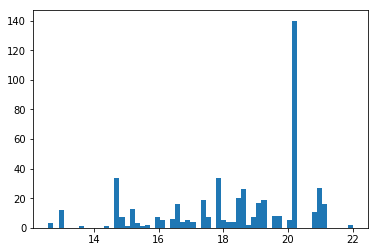

In [3]:
# Read dataset and import necessary libraries
from numpy import matrix
from numpy.linalg import inv
import statistics

# Load the Boston housing dataset
boston = pd.read_csv('BostonHousing.csv')
boston.head()
x=np.array(boston)
np.shape(x)
x1 = x[:,5] #RM
x2 = x[:,12] #LSTAT
x3 = x[:,10] #PTRATIO
#############################################EX1
meanx1=x1.mean()
meanx2=x2.mean()
meanx3=x3.mean()
std1=np.std(x1)
std2=np.std(x2)
std3=np.std(x3)
medianx1=statistics.median(x1)
medianx1=statistics.median(x2)
medianx1= statistics.median(x3)
minx1=min(x1)
minx2=min(x2)
minx3=min(x3)
maxx1=max(x1)
maxx3=max(x2)
maxx3=max(x3)
##############################################EX2

t = x[:,13]  #t --> valors a predeir medv

#X=np.transpose(np.array([np.ones(),x1,x2,x3]))
#w=np.dot(np.dot(inv(np.dot(np.transpose(X),X)),np.transpose(X)),t)
#w=np.dot(np.linalg.pinv(X),t)

#P=np.corrcoef(np.transpose(X),t)

plt.hist(x1, bins = 60)
plt.show()
plt.hist(x2, bins = 60)
plt.show()
plt.hist(x3, bins = 60)
plt.show()




**Q2. Regression model with one variable** 

Select the most correlated attribute (out of the 3 most significative: RM, LSTAT and PTRATIO) to the variable to predict (MEDV).

a) Plot the data points $(x_j,t_j)$ and choose a regression model (linear, polynomial,...) according to the data set.

b) Train the chosen regression model with (1) the closed-form solution and (2) with a batch gradient descent strategy. Plot both models on the dataset and analyse the results.

c) For the gradient descent strategy, plot the error-iteration graph for different choices of the learning rate $\alpha$.  Comment the result.

In [4]:
# computeCost : average sum of squares error. Expects
#     X : NxD design matrix
#     t : Nx1 target response variable
#     theta : model parameters
def computeCost(X, t, theta):
    N = len(t) # number of training examples
    temp = np.dot(X, theta) - t
    return np.sum(np.power(temp, 2)) / (2*N)

# gradientDescent expects 
#     X : matrix of shape NxD
#     t : vector of shape Nx1
#     alpha : learning rate
#     T : number of iterations
# Returns a Tx2x1 tensor with theta for each iteration

def gradientDescent(X, t, theta, alpha, T):
    vtheta = np.zeros([T,2])
    N = len(t) # number of training examples
    for it in range(T):
        y = np.dot(X, theta) - t     # error for current parameters theta
        grad = np.dot(X.T, y)        # product between error and input
        theta = theta - (alpha/N) * grad
        vtheta[it,:] = theta
    return vtheta

In [5]:
'''
plt.scatter(x1,t)
plt.show()
plt.scatter(x2,t)
plt.show()
plt.scatter(x3,t)
plt.show()
'''
x2 = np.array(x2)


[42.86214057 -2.33284152  0.04354754]
[1.08442834 1.05913867]


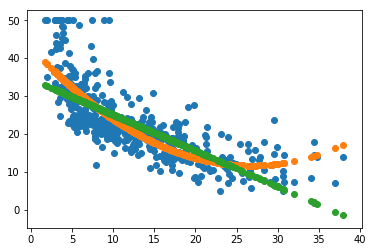

In [9]:
X=np.array([np.ones(len(x2)),x2,np.multiply(x2, x2)], dtype = np.float32)
X = np.transpose(X)
w= np.dot(np.dot(inv(np.dot(np.transpose(X),X)),np.transpose(X)), t)
print(w)
y = np.dot(X,w)
plt.scatter(x2,t)
plt.scatter(x2,y)
theta = gradientDescent(X[:,:2], t,np.ones(len(X[0])-1), 0.005, 20000 )
y2 = np.dot(X[:,:2],theta[-1,:])
plt.scatter(x2,y2)

print(theta[1,:])

**Q3. Regression model with regularisation**

With the same data as in Question 2:

a) Develop a Ridge regression solution (using weight decay regularization) using a batch gradient descent strategy. Plot the weights as a function of $\lambda$ (lambda). What happens with $\lambda$ increases? Why? <br>
*Comment: Consider exponential steps for $\lambda$, e.g. $\lambda$ = logscale(-6,1,50).*<br>
*Note: Remember that the parameters updates of the batch gradient descent with regularisation are defined as $w_j \leftarrow w_j - \alpha \frac{1}{N}\sum_{n=1}^N (y(\vec{x}_n,\vec{w}) - t_n)x_{n,j} - \alpha \lambda w_j$.*

b) Execute a random selection of the 80% of the dataset for training and 20% for testing. Compute the Ridge regression solution (as in the previous exercice) for the 80% for the training set (80% of the dataset) and compute the error in the test set (20% of the dataset). Plot the error in the test set as a function of $\lambda$ (e.g. the same $\lambda$ as in the previous exercice). Comment the results.

**Q4. Optional:** Repeat Question 3 for a Lasso regression function.

**Q5: Predicting Selling Prices**
Imagine that we were a real estate agent in the Boston area looking to use this model to help price homes owned by our clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| --- | --- | --- | --- |
| Total number of rooms | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32 % | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


a) What price would we recommend each client sell his/her home at? <br>
b) Do these prices seem reasonable given the values for the respective features?
